In [0]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [95]:
# Load a dataset for income prediction.
# # Download a dataset on http://archive.ics.uci.edu/ml/datasets/Adult
%%time
income = pd.read_csv('./drive/My Drive/ML_Code/Income Prediction/income_dataset.csv')

CPU times: user 73.6 ms, sys: 9.14 ms, total: 82.8 ms
Wall time: 105 ms


In [96]:
# Print dataset information.
%%time
print(income.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
CPU times: user 20.1 ms, sys: 1 ms, total: 21.1 ms
Wall time: 23.1 ms


In [97]:
# Print dataset header.
income.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


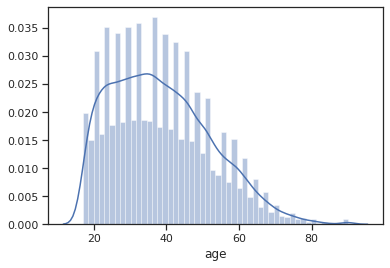

In [98]:
sns.distplot(income['age'])
plt.show()

In [99]:
# Find rows with missing values as '?'.
income_1 = income[income.workclass == '?']
income_1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [100]:
income_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 32544
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1836 non-null   int64 
 1   workclass       1836 non-null   object
 2   fnlwgt          1836 non-null   int64 
 3   education       1836 non-null   object
 4   education.num   1836 non-null   int64 
 5   marital.status  1836 non-null   object
 6   occupation      1836 non-null   object
 7   relationship    1836 non-null   object
 8   race            1836 non-null   object
 9   sex             1836 non-null   object
 10  capital.gain    1836 non-null   int64 
 11  capital.loss    1836 non-null   int64 
 12  hours.per.week  1836 non-null   int64 
 13  native.country  1836 non-null   object
 14  income          1836 non-null   object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


In [101]:
# Drop the rows if having missing values in workclass column.
income = income[income['workclass'] != '?']
income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [102]:
# Select all categorical variables.
income_categorical = income.select_dtypes(include=['object'])

# Check whether any other columns contain a '?'
income_categorical.apply(lambda x: x=='?', axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [103]:
# Drop the rows if having missing values in occupaation and native.country columns.
income = income[income['occupation'] != '?']
income = income[income['native.country'] != '?']
income.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K


In [104]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [105]:
# Select all categorical variables.
income_categorical = income.select_dtypes(include=['object'])
income_categorical.head(10)

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K
7,State-gov,Doctorate,Never-married,Prof-specialty,Other-relative,White,Female,United-States,>50K
8,Federal-gov,HS-grad,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
10,Private,Doctorate,Divorced,Prof-specialty,Unmarried,Black,Female,United-States,>50K
11,Self-emp-not-inc,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Male,United-States,>50K
12,Private,Bachelors,Widowed,Other-service,Not-in-family,White,Female,United-States,>50K


In [106]:
# Apply Label Encoder to income_categorical.
le = preprocessing.LabelEncoder()
income_categorical = income_categorical.apply(le.fit_transform)
income_categorical.head(10)

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0
7,5,10,4,9,2,4,0,38,1
8,0,11,0,9,1,4,0,38,0
10,2,10,0,9,4,2,0,38,1
11,4,14,4,9,1,4,1,38,1
12,2,9,6,7,1,4,0,38,1


In [107]:
# Concatenate income_categorical with original income
income = income.drop(income_categorical.columns, axis=1)
income = pd.concat([income, income_categorical], axis=1)
income.head(10)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0
7,74,88638,16,0,3683,20,5,10,4,9,2,4,0,38,1
8,68,422013,9,0,3683,40,0,11,0,9,1,4,0,38,0
10,45,172274,16,0,3004,35,2,10,0,9,4,2,0,38,1
11,38,164526,15,0,2824,45,4,14,4,9,1,4,1,38,1
12,52,129177,13,0,2824,20,2,9,6,7,1,4,0,38,1


In [108]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int64
 7   education       30162 non-null  int64
 8   marital.status  30162 non-null  int64
 9   occupation      30162 non-null  int64
 10  relationship    30162 non-null  int64
 11  race            30162 non-null  int64
 12  sex             30162 non-null  int64
 13  native.country  30162 non-null  int64
 14  income          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


<Figure size 720x720 with 0 Axes>

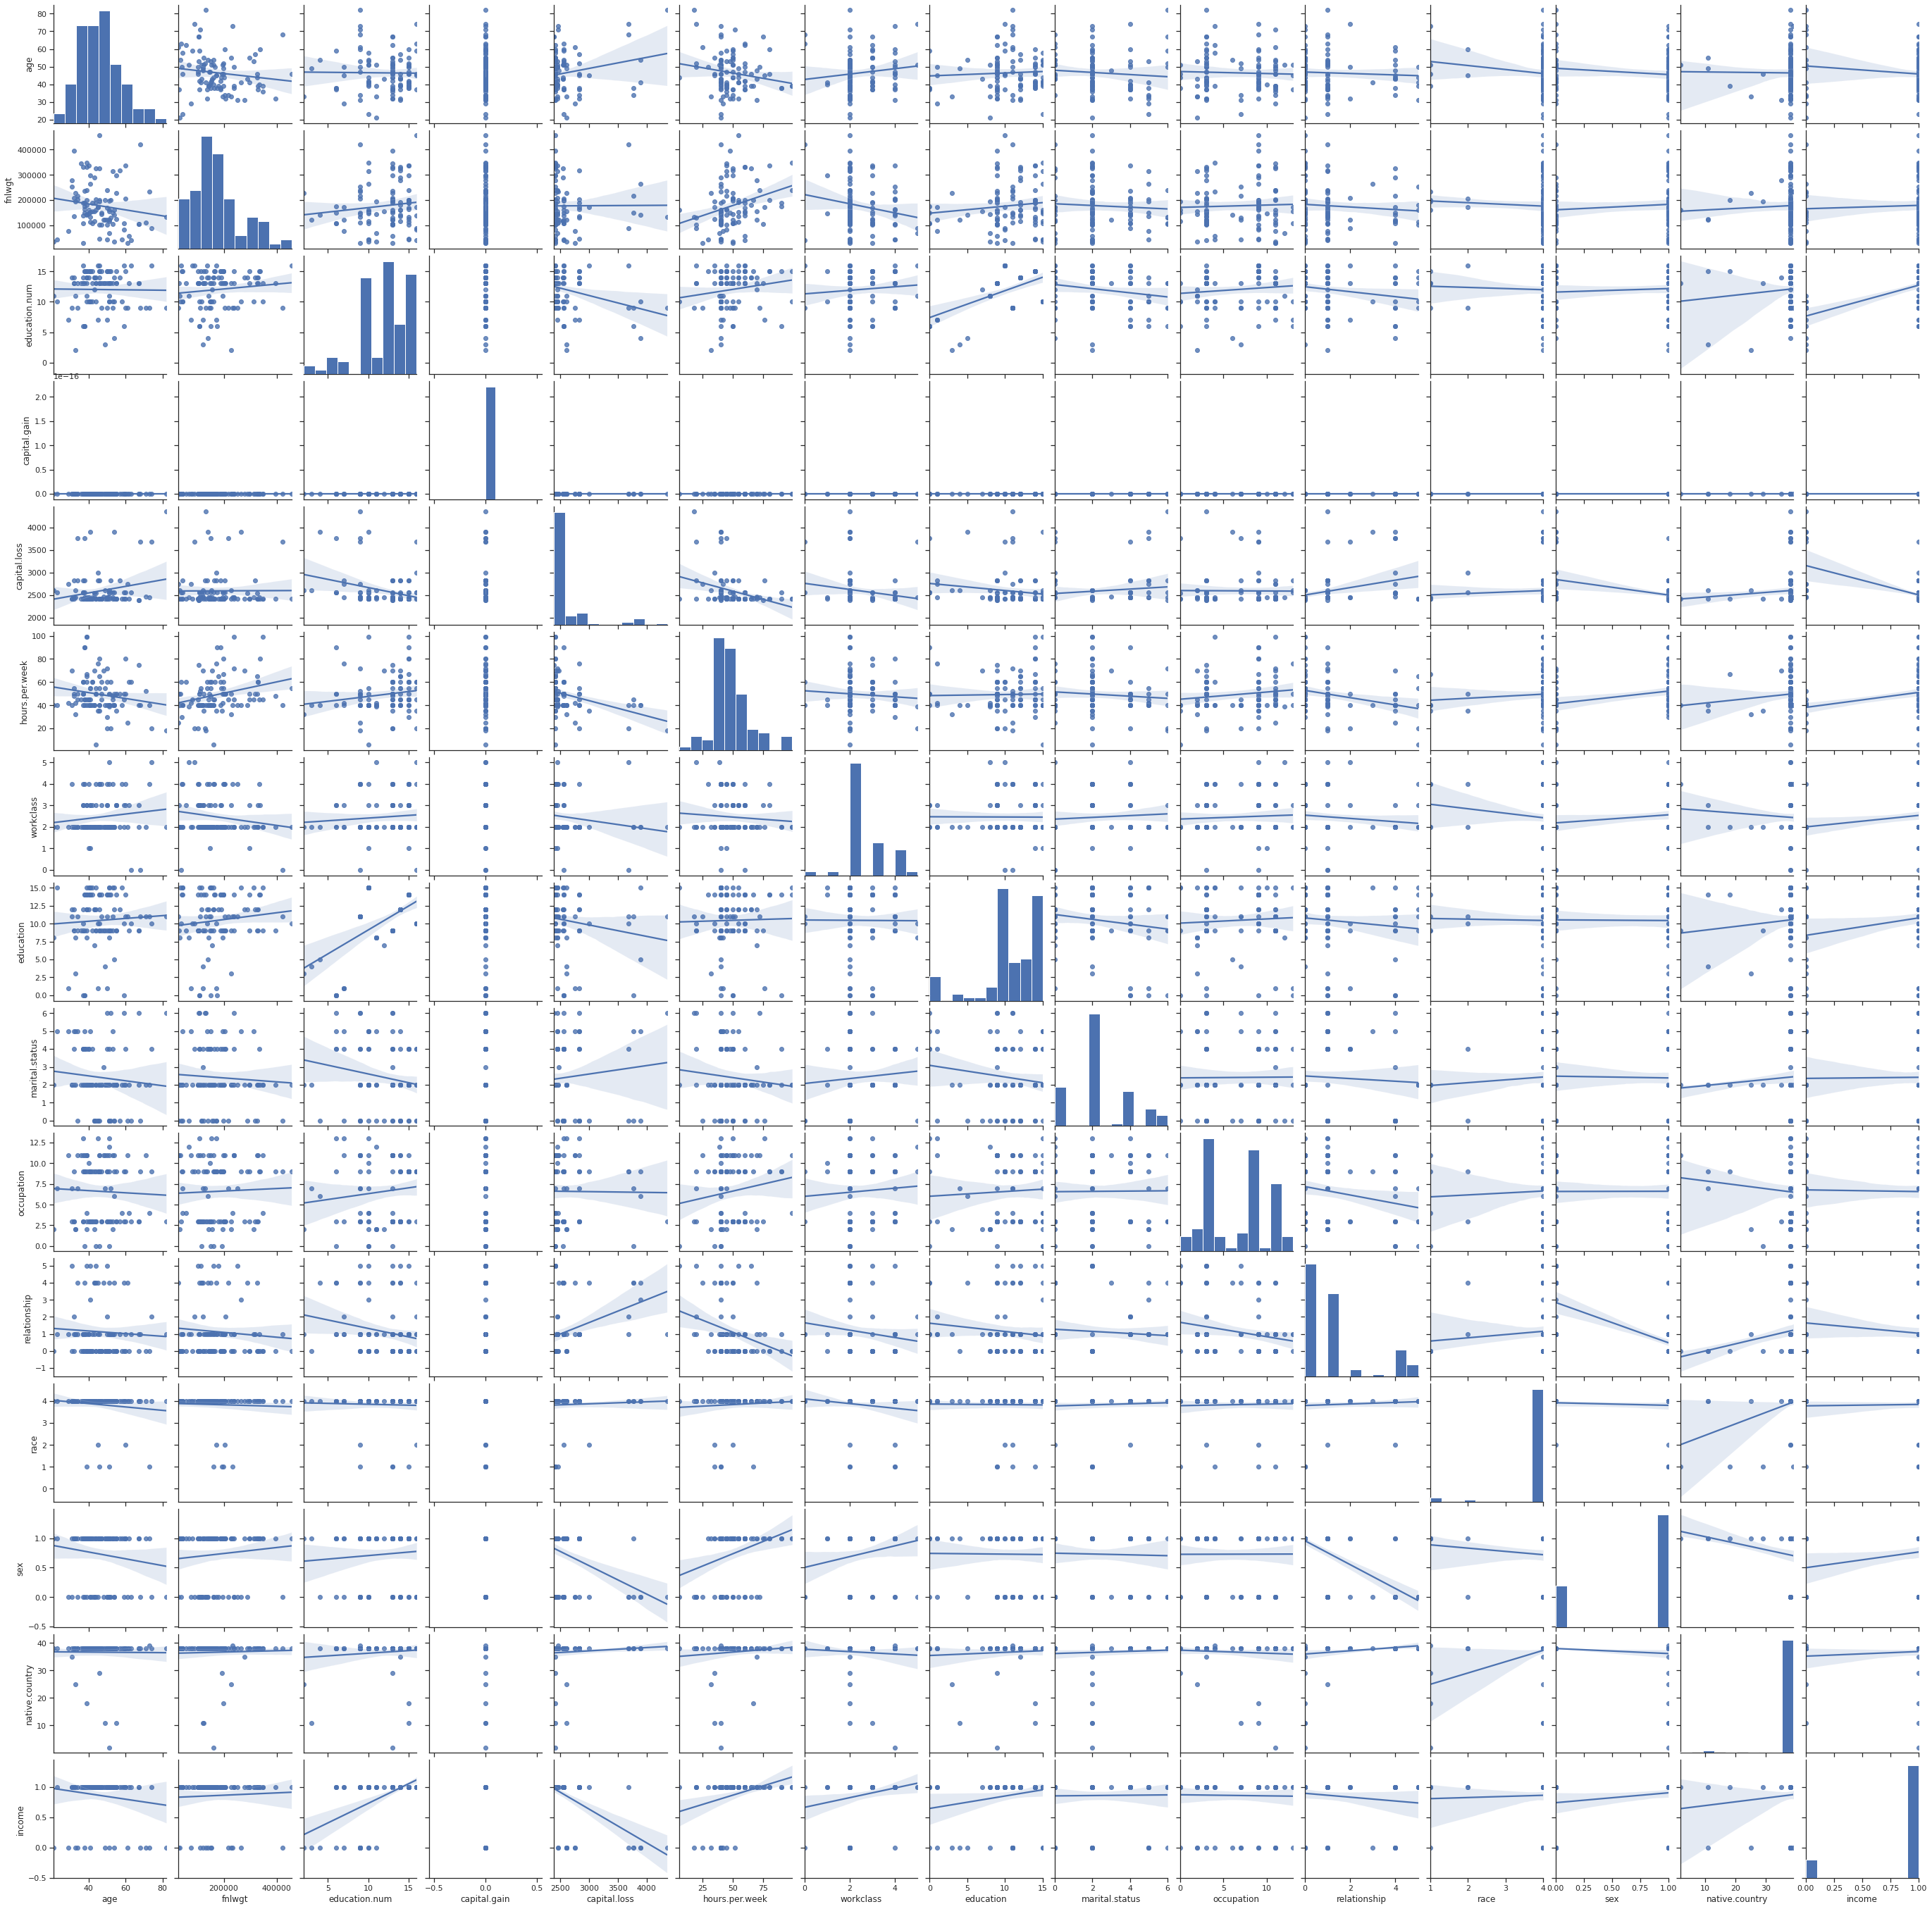

CPU times: user 1min 29s, sys: 20.2 s, total: 1min 49s
Wall time: 1min 26s


In [109]:
# Make a paiwise scatter plot.
%%time
plt.figure(figsize=(10, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(income[:100], kind="reg") # To save time, consider 100 rows only.
plt.show()

In [110]:
# Display correlation matrix
cor = income.corr()
cor

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599,0.080540,-0.001111,-0.276373,-0.005682,-0.246456,0.023374,0.081993,-0.001905,0.241998
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886,-0.032493,-0.027102,0.032163,0.000204,0.009298,-0.023895,0.025362,-0.066717,-0.008957
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522,0.037833,0.345410,-0.063419,0.087717,-0.091935,0.032805,0.006157,0.091555,0.335286
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432,0.035350,0.030575,-0.042418,0.022162,-0.058259,0.014353,0.048814,0.008530,0.221196
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417,0.007204,0.015028,-0.035203,0.014607,-0.063567,0.023517,0.047011,0.009386,0.150053
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000,0.050724,0.059887,-0.189003,0.018365,-0.257850,0.048532,0.231268,0.008408,0.229480
workclass,0.080540,-0.032493,0.037833,0.035350,0.007204,0.050724,1.000000,0.017855,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.007668,0.018044
education,-0.001111,-0.027102,0.345410,0.030575,0.015028,0.059887,0.017855,1.000000,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,0.078790,0.078987
marital.status,-0.276373,0.032163,-0.063419,-0.042418,-0.035203,-0.189003,-0.034241,-0.040664,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.025902,-0.193518
occupation,-0.005682,0.000204,0.087717,0.022162,0.014607,0.018365,0.015572,-0.038212,0.022655,1.000000,-0.053727,0.000717,0.062313,-0.003483,0.051577


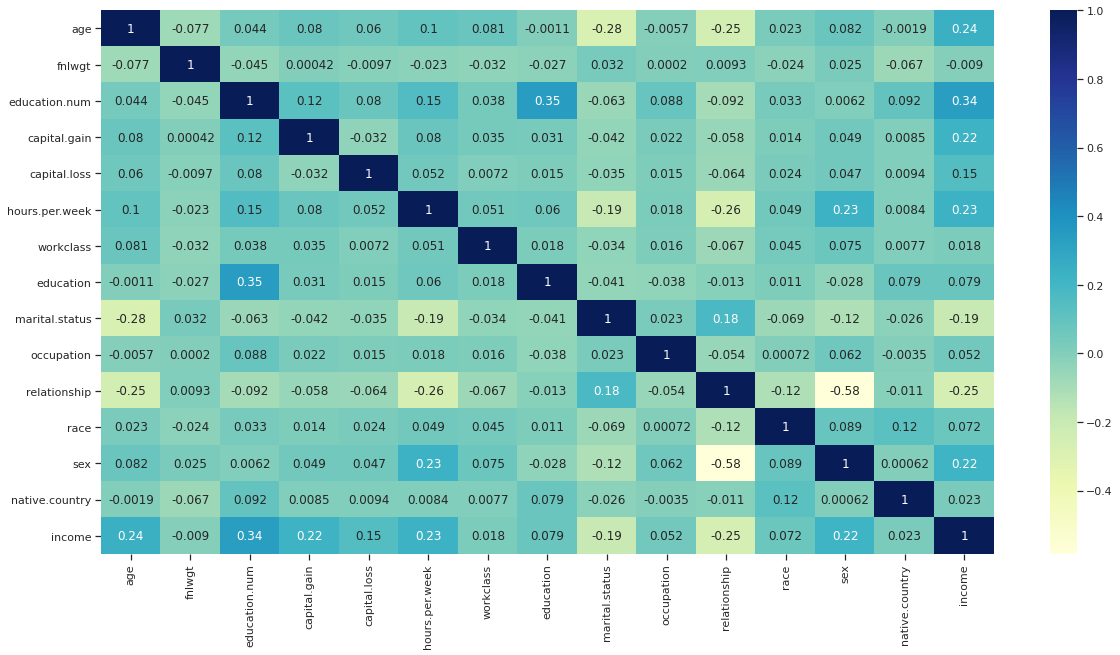

In [111]:
# Plot correlations on a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [0]:
# Convert target variable income to categorical
income['income'] = income['income'].astype('category')

In [113]:
income.head(10)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0
7,74,88638,16,0,3683,20,5,10,4,9,2,4,0,38,1
8,68,422013,9,0,3683,40,0,11,0,9,1,4,0,38,0
10,45,172274,16,0,3004,35,2,10,0,9,4,2,0,38,1
11,38,164526,15,0,2824,45,4,14,4,9,1,4,1,38,1
12,52,129177,13,0,2824,20,2,9,6,7,1,4,0,38,1


In [114]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   fnlwgt          30162 non-null  int64   
 2   education.num   30162 non-null  int64   
 3   capital.gain    30162 non-null  int64   
 4   capital.loss    30162 non-null  int64   
 5   hours.per.week  30162 non-null  int64   
 6   workclass       30162 non-null  int64   
 7   education       30162 non-null  int64   
 8   marital.status  30162 non-null  int64   
 9   occupation      30162 non-null  int64   
 10  relationship    30162 non-null  int64   
 11  race            30162 non-null  int64   
 12  sex             30162 non-null  int64   
 13  native.country  30162 non-null  int64   
 14  income          30162 non-null  category
dtypes: category(1), int64(14)
memory usage: 3.5 MB


### **Decision Tree**

In [0]:
# Split a dataset into X and y.
X = income.drop('income',axis=1)
y = income['income']

In [0]:
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [117]:
# Fit the Decision Tree model.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [118]:
# Make predictions.
y_pred_default = dt_default.predict(X_test)

# Print classification report.
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6761
           1       0.79      0.53      0.64      2288

    accuracy                           0.85      9049
   macro avg       0.83      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [119]:
# Print confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred_default))

[[6444  317]
 [1071 1217]]
Accuracy: 0.85


### **Plot the Decision Tree**

In [120]:
# Put features.
features = list(income.columns[1:])
features

['fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

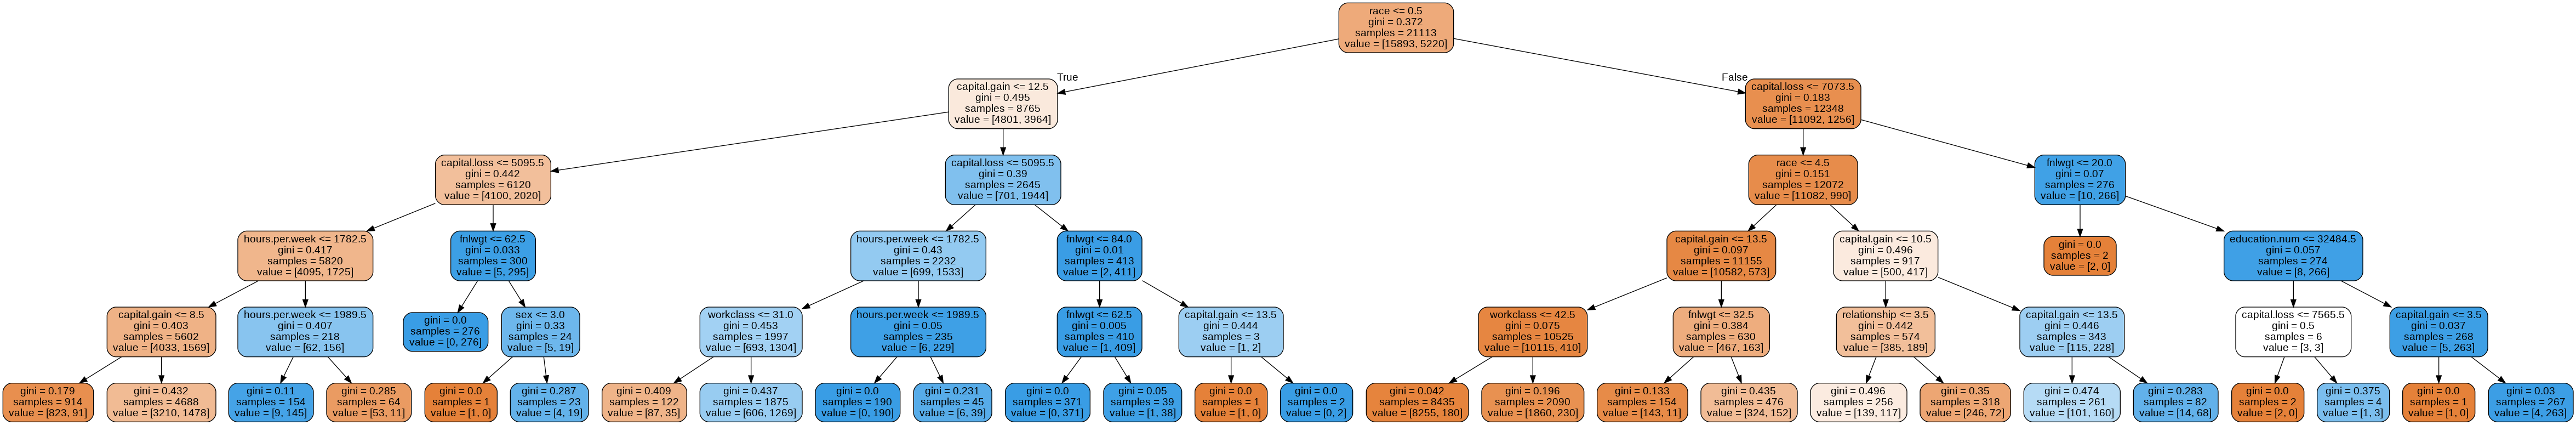

In [121]:
# Plot the tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [122]:
# Set number of folds for k-fold Cross-Validation.
n_folds = 10

# Set up GridSearchCV() function with the range of hyperparameters.
parameters = {'max_depth': range(1, 40)}

# Instantiate the Decision Tree model.
dtree = DecisionTreeClassifier(criterion="gini", random_state=0)
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=Fals

In [123]:
# Display scores of GridSearch CV.
scores = tree.cv_results_
pd.DataFrame(scores).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019318,0.007054,0.002392,0.000509,1,{'max_depth': 1},0.752841,0.752841,0.752841,0.752724,0.752724,0.752724,0.752724,0.752724,0.752724,0.752724,0.752759,0.000054,39
1,0.019265,0.000108,0.001656,0.000058,2,{'max_depth': 2},0.835701,0.820076,0.825284,0.813359,0.835623,0.810516,0.829938,0.828991,0.819991,0.818096,0.823757,0.008334,16
2,0.026019,0.000258,0.001730,0.000035,3,{'max_depth': 3},0.846117,0.839015,0.840436,0.828991,0.849834,0.821885,0.842255,0.840834,0.832781,0.832781,0.837493,0.007949,12
3,0.033518,0.001493,0.001896,0.000167,4,{'max_depth': 4},0.851799,0.847538,0.847538,0.831360,0.854098,0.828044,0.845097,0.845097,0.844150,0.839886,0.843461,0.007865,9
4,0.038999,0.000194,0.001850,0.000038,5,{'max_depth': 5},0.853693,0.849432,0.848958,0.840834,0.858361,0.835149,0.847939,0.852203,0.848887,0.841781,0.847724,0.006447,6
5,0.045288,0.001191,0.001837,0.000027,6,{'max_depth': 6},0.857955,0.847064,0.851799,0.841781,0.855519,0.841307,0.855992,0.853150,0.844150,0.842255,0.849097,0.006169,4
6,0.050876,0.000233,0.001849,0.000024,7,{'max_depth': 7},0.857008,0.848011,0.857481,0.842729,0.858361,0.837518,0.851255,0.855992,0.848887,0.850308,0.850755,0.006486,3
7,0.057117,0.001241,0.001934,0.000105,8,{'max_depth': 8},0.856061,0.851799,0.860795,0.837991,0.858835,0.839413,0.852203,0.859308,0.848887,0.846518,0.851181,0.007627,2
8,0.062501,0.000292,0.001980,0.000080,9,{'max_depth': 9},0.856061,0.846117,0.860322,0.842255,0.857887,0.840360,0.855992,0.856940,0.845571,0.850308,0.851181,0.006807,1
9,0.068280,0.001454,0.001976,0.000060,10,{'max_depth': 10},0.848485,0.850852,0.859848,0.836570,0.854098,0.837518,0.852203,0.854098,0.837991,0.846992,0.847866,0.007631,5


In [124]:
print("Best parameters set found on development set:")
print()
print(tree.best_params_)
print()
print("Grid scores on development set:")
print()
means = tree.cv_results_['mean_test_score']
stds = tree.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, tree.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'max_depth': 9}

Grid scores on development set:

0.753 (+/-0.000) for {'max_depth': 1}
0.824 (+/-0.017) for {'max_depth': 2}
0.837 (+/-0.016) for {'max_depth': 3}
0.843 (+/-0.016) for {'max_depth': 4}
0.848 (+/-0.013) for {'max_depth': 5}
0.849 (+/-0.012) for {'max_depth': 6}
0.851 (+/-0.013) for {'max_depth': 7}
0.851 (+/-0.015) for {'max_depth': 8}
0.851 (+/-0.014) for {'max_depth': 9}
0.848 (+/-0.015) for {'max_depth': 10}
0.846 (+/-0.014) for {'max_depth': 11}
0.845 (+/-0.014) for {'max_depth': 12}
0.843 (+/-0.019) for {'max_depth': 13}
0.838 (+/-0.018) for {'max_depth': 14}
0.834 (+/-0.018) for {'max_depth': 15}
0.828 (+/-0.014) for {'max_depth': 16}
0.828 (+/-0.013) for {'max_depth': 17}
0.824 (+/-0.014) for {'max_depth': 18}
0.818 (+/-0.015) for {'max_depth': 19}
0.815 (+/-0.013) for {'max_depth': 20}
0.813 (+/-0.021) for {'max_depth': 21}
0.810 (+/-0.016) for {'max_depth': 22}
0.810 (+/-0.017) for {'max_depth': 23}
0.809 (+/-0.01

In [125]:
# Set number of folds for k-fold Cross-Validation.
n_folds = 10

# Set up GridSearchCV() function with the range of hyperparameters.
parameters = {'min_samples_leaf': range(5, 200, 20)}

# Instantiate the model
dtree = DecisionTreeClassifier(criterion="gini", random_state=0)
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [126]:
# Display scores of GridSearch CV.
scores = tree.cv_results_
pd.DataFrame(scores).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.099943,0.003868,0.002180,0.000137,5,{'min_samples_leaf': 5},0.837121,0.821496,0.825284,0.817148,0.837518,0.817148,0.824728,0.837044,0.828991,0.823780,0.827026,0.007489,10
1,0.082491,0.001323,0.002007,0.000027,25,{'min_samples_leaf': 25},0.858428,0.846117,0.848958,0.835149,0.849834,0.836097,0.849834,0.842729,0.851255,0.844623,0.846303,0.006691,9
2,0.075296,0.002928,0.002004,0.000084,45,{'min_samples_leaf': 45},0.857481,0.849905,0.846591,0.844150,0.855519,0.839413,0.854098,0.852676,0.848887,0.849360,0.849808,0.005192,3
3,0.071517,0.002965,0.002012,0.000151,65,{'min_samples_leaf': 65},0.858428,0.848011,0.852746,0.840360,0.851255,0.838465,0.857887,0.849834,0.842729,0.849360,0.848908,0.006432,6
4,0.068297,0.002280,0.001995,0.000055,85,{'min_samples_leaf': 85},0.860322,0.850379,0.852273,0.837518,0.849834,0.842255,0.861677,0.850308,0.844150,0.848413,0.849713,0.007071,4
5,0.066678,0.003486,0.001946,0.000020,105,{'min_samples_leaf': 105},0.860322,0.850379,0.853220,0.834202,0.854571,0.844150,0.862624,0.852676,0.845571,0.852203,0.850992,0.007765,1
6,0.063937,0.002214,0.001944,0.000031,125,{'min_samples_leaf': 125},0.859848,0.850379,0.852273,0.835623,0.857414,0.840360,0.857887,0.852676,0.843676,0.855519,0.850565,0.007704,2
7,0.061744,0.001351,0.001994,0.000264,145,{'min_samples_leaf': 145},0.858902,0.851326,0.851326,0.838939,0.857414,0.837991,0.852676,0.848887,0.844150,0.848413,0.849002,0.006629,5
8,0.060578,0.001973,0.001907,0.000028,165,{'min_samples_leaf': 165},0.858428,0.851326,0.848011,0.838939,0.855519,0.837044,0.852676,0.851729,0.844623,0.848413,0.848671,0.006491,7
9,0.058917,0.001991,0.001909,0.000026,185,{'min_samples_leaf': 185},0.853220,0.846591,0.851799,0.832307,0.856466,0.834202,0.849834,0.855519,0.848887,0.848887,0.847771,0.007829,8


In [127]:
print("Best parameters set found on development set:")
print()
print(tree.best_params_)
print()
print("Grid scores on development set:")
print()
means = tree.cv_results_['mean_test_score']
stds = tree.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, tree.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'min_samples_leaf': 105}

Grid scores on development set:

0.827 (+/-0.015) for {'min_samples_leaf': 5}
0.846 (+/-0.013) for {'min_samples_leaf': 25}
0.850 (+/-0.010) for {'min_samples_leaf': 45}
0.849 (+/-0.013) for {'min_samples_leaf': 65}
0.850 (+/-0.014) for {'min_samples_leaf': 85}
0.851 (+/-0.016) for {'min_samples_leaf': 105}
0.851 (+/-0.015) for {'min_samples_leaf': 125}
0.849 (+/-0.013) for {'min_samples_leaf': 145}
0.849 (+/-0.013) for {'min_samples_leaf': 165}
0.848 (+/-0.016) for {'min_samples_leaf': 185}


In [128]:
# Set number of folds for k-fold Cross-Validation.
n_folds = 10

# Set up GridSearchCV() function with the range of hyperparameters.
parameters = {'min_samples_split': range(5, 200, 20)}

# Instantiate the model.
dtree = DecisionTreeClassifier(criterion="gini", random_state=0)
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [129]:
# Display scores of GridSearch CV.
scores = tree.cv_results_
pd.DataFrame(scores).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.106863,0.004903,0.002177,0.000092,5,{'min_samples_split': 5},0.821023,0.810133,0.811553,0.795831,0.819043,0.796305,0.818569,0.815727,0.816675,0.812411,0.811727,0.008490,10
1,0.097841,0.001914,0.002159,0.000281,25,{'min_samples_split': 25},0.844697,0.827652,0.834754,0.825201,0.838939,0.814780,0.832307,0.839886,0.828991,0.827096,0.831430,0.008190,9
2,0.094905,0.002153,0.002067,0.000020,45,{'min_samples_split': 45},0.848958,0.837121,0.836648,0.825675,0.843676,0.827570,0.835149,0.847939,0.834202,0.831833,0.836877,0.007499,8
3,0.092458,0.002355,0.002078,0.000034,65,{'min_samples_split': 65},0.851799,0.839962,0.847064,0.824728,0.843202,0.836097,0.836097,0.852203,0.840360,0.837044,0.840856,0.007833,7
4,0.089792,0.002296,0.002015,0.000024,85,{'min_samples_split': 85},0.850379,0.844223,0.848011,0.831833,0.847466,0.836570,0.843202,0.856940,0.838939,0.842255,0.843982,0.006847,6
5,0.088969,0.002211,0.002030,0.000045,105,{'min_samples_split': 105},0.852273,0.846117,0.849905,0.837518,0.849834,0.839413,0.850308,0.857887,0.841307,0.845097,0.846966,0.005984,5
6,0.087020,0.002199,0.001999,0.000063,125,{'min_samples_split': 125},0.854167,0.847538,0.848958,0.838939,0.848887,0.841781,0.853150,0.854571,0.843202,0.844623,0.847582,0.005129,4
7,0.087112,0.004139,0.002142,0.000267,145,{'min_samples_split': 145},0.855114,0.851326,0.850852,0.839886,0.851729,0.846992,0.856466,0.857414,0.842255,0.849360,0.850139,0.005477,3
8,0.084009,0.002069,0.001999,0.000036,165,{'min_samples_split': 165},0.857955,0.851326,0.849432,0.841307,0.860256,0.848887,0.856466,0.858835,0.841307,0.847939,0.851371,0.006544,2
9,0.083726,0.003822,0.002022,0.000066,185,{'min_samples_split': 185},0.853220,0.850379,0.854640,0.844623,0.859782,0.846992,0.862151,0.861203,0.843202,0.847939,0.852413,0.006566,1


In [130]:
print("Best parameters set found on development set:")
print()
print(tree.best_params_)
print()
print("Grid scores on development set:")
print()
means = tree.cv_results_['mean_test_score']
stds = tree.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, tree.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'min_samples_split': 185}

Grid scores on development set:

0.812 (+/-0.017) for {'min_samples_split': 5}
0.831 (+/-0.016) for {'min_samples_split': 25}
0.837 (+/-0.015) for {'min_samples_split': 45}
0.841 (+/-0.016) for {'min_samples_split': 65}
0.844 (+/-0.014) for {'min_samples_split': 85}
0.847 (+/-0.012) for {'min_samples_split': 105}
0.848 (+/-0.010) for {'min_samples_split': 125}
0.850 (+/-0.011) for {'min_samples_split': 145}
0.851 (+/-0.013) for {'min_samples_split': 165}
0.852 (+/-0.013) for {'min_samples_split': 185}


### **Grid Search for Optimal Hyperparameters**

In [131]:
# Set number of folds for k-fold Cross-Validation.
n_folds = 10

# Set up GridSearchCV() function with the range of hyperparameters.
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model.
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=n_folds, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    9.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                  

In [132]:
# Display scores of GridSearch CV.
cv_results = pd.DataFrame(grid_search.cv_results_)
pd.DataFrame(cv_results).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048438,0.002618,0.001998,0.000251,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.854167,0.845170,0.849905,0.835623,0.855992,0.830412,0.848887,0.848413,0.841307,0.841781,0.845166,0.007617,15
1,0.047487,0.000932,0.001828,0.000035,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.854167,0.845170,0.849905,0.835623,0.855992,0.830412,0.848887,0.848413,0.841307,0.841781,0.845166,0.007617,15
2,0.046597,0.001220,0.001887,0.000122,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.856061,0.845170,0.850852,0.835623,0.855992,0.830412,0.848887,0.848413,0.841307,0.841781,0.845450,0.007918,13
3,0.046214,0.000186,0.001855,0.000038,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.856061,0.845170,0.850852,0.835623,0.855992,0.830412,0.848887,0.848413,0.841307,0.841781,0.845450,0.007918,13
4,0.076760,0.001077,0.001974,0.000041,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.855587,0.843750,0.855587,0.835149,0.849834,0.839886,0.857414,0.852676,0.841307,0.851729,0.848292,0.007320,7
5,0.076892,0.001259,0.001959,0.000100,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.855587,0.843750,0.855587,0.835149,0.849834,0.839886,0.857414,0.852676,0.841307,0.851729,0.848292,0.007320,7
6,0.072277,0.001436,0.001896,0.000024,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.860795,0.848958,0.852746,0.836097,0.855045,0.841307,0.860730,0.855519,0.844623,0.850782,0.850660,0.007683,3
7,0.071983,0.000812,0.001938,0.000052,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.860795,0.848958,0.852746,0.836097,0.855045,0.841307,0.860730,0.855519,0.844623,0.850782,0.850660,0.007683,3
8,0.038218,0.000971,0.001843,0.000056,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.854167,0.849432,0.849905,0.840834,0.858361,0.835149,0.848887,0.852203,0.848887,0.841781,0.847961,0.006523,9
9,0.037942,0.000244,0.001825,0.000033,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.854167,0.849432,0.849905,0.840834,0.858361,0.835149,0.848887,0.852203,0.848887,0.841781,0.847961,0.006523,9


In [133]:
# Print the best hyperparameters and accuracy.
print(grid_search.best_estimator_)
print('Accuracy: %.2f' % (grid_search.best_score_))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy: 0.85


In [134]:
# Run the Decision Tree model with optimal hyperparameters.
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=10, min_samples_leaf=50, min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [135]:
# Print accuracy with optical hyperparameters.
print('Accuracy: %.2f' % (clf_gini.score(X_test,y_test)))

Accuracy: 0.85


In [136]:
# Plot the tree.
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [137]:
# Train Decision Tree model with max_depth=3.
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)
print('Accuracy: %.2f' % (clf_gini.score(X_test,y_test)))

Accuracy: 0.83


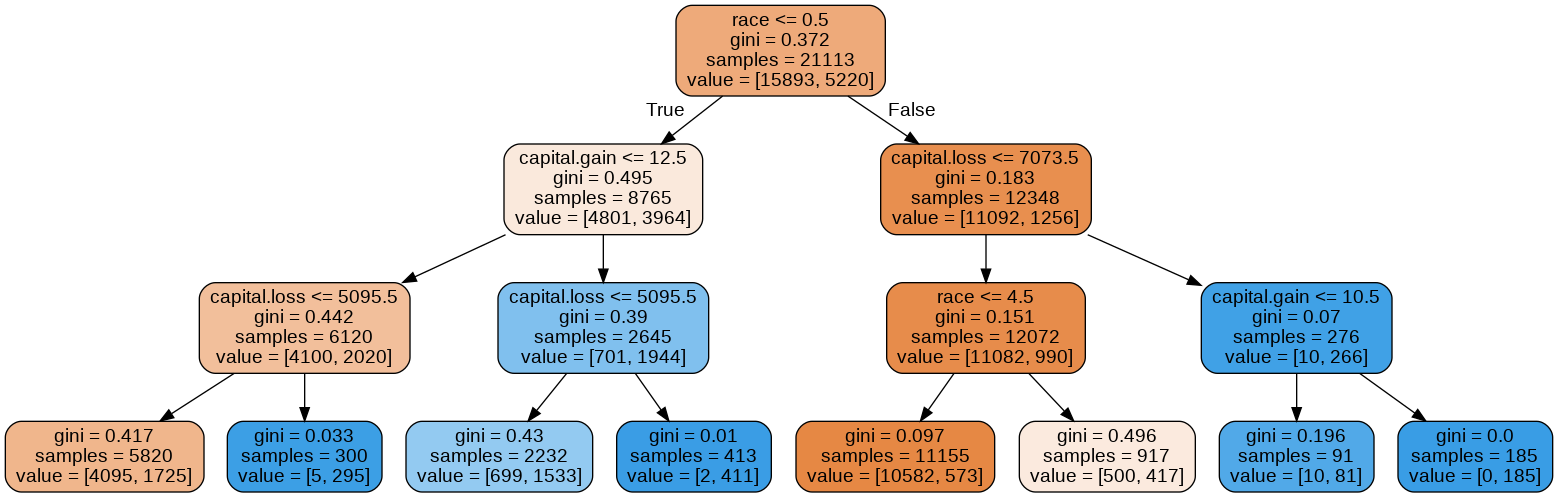

In [138]:
# Plot the tree with max_depth=3.
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [139]:
# Print classification matrix.
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      6761
           1       0.78      0.47      0.58      2288

    accuracy                           0.83      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.83      0.82      9049

